Import

In [29]:
import pandas as pd
mes_df = pd.read_csv("MES_0225copy.csv")
mes_df.head()

,Country,Balance,Product,Value,Unit,Year,Month
0,Australia,Net Electricity Production,Electricity,22374.9709,GWh,2025,Feb
1,Australia,Net Electricity Production,Hydro,835.0083,GWh,2025,Feb
2,Australia,Net Electricity Production,Total Combustible Fuels,12945.7237,GWh,2025,Feb
3,Australia,Net Electricity Production,"Coal, Peat and Manufactured Gases",9206.0728,GWh,2025,Feb
4,Australia,Net Electricity Production,Oil and Petroleum Products,320.1403,GWh,2025,Feb


In [31]:
# View column names
print("Columns:", mes_df.columns.tolist())

# View unique countries
print("\nCountries:")
print(sorted(mes_df['Country'].unique()))


Columns: ['Country', 'Balance', 'Product', 'Value', 'Unit', 'Year', 'Month']

Countries:
['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'IEA Total', 'Iceland', 'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'OECD Americas', 'OECD Asia Oceania', 'OECD Europe', 'OECD Total', "People's Republic of China", 'Poland', 'Portugal', 'Republic of Turkiye', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']


In [32]:
valid_mes_countries = sorted([
    c for c in mes_df['Country'].unique()
    if not c.startswith("OECD") and "Total" not in c
])

print("Valid MES Countries:", valid_mes_countries)


Valid MES Countries: ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', "People's Republic of China", 'Poland', 'Portugal', 'Republic of Turkiye', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']


In [33]:
mes_df.tail()

,Country,Balance,Product,Value,Unit,Year,Month
149980,IEA Total,Total Exports,Electricity,32372.583,GWh,2010,Jan
149981,IEA Total,Used for pumped storage,Electricity,6869.253,GWh,2010,Jan
149982,IEA Total,Distribution Losses,Electricity,62000.733,GWh,2010,Jan
149983,IEA Total,Final Consumption (Calculated),Electricity,877213.615,GWh,2010,Jan
149984,IEA Total,Net Electricity Production,Wind,21659.612,GWh,2010,Jan


In [34]:
mes_df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Republic of Turkiye', 'United Kingdom',
       'United States', 'OECD Americas', 'OECD Asia Oceania',
       'OECD Europe', 'OECD Total', 'IEA Total', 'Argentina', 'Brazil',
       'Bulgaria', "People's Republic of China", 'Croatia', 'Cyprus',
       'India', 'Malta', 'North Macedonia', 'Romania', 'Serbia'],
      dtype=object)

Load Country GDP till 2023


In [35]:
gdp_raw  = pd.read_csv("GDP_file.csv")
gdp_only = gdp_raw[gdp_raw['IndicatorName'] == 'Gross Domestic Product (GDP)'].copy()


In [36]:
gdp_only['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Czechoslovakia (Former)', 'D.P.R. of Korea', 'D.R. of the Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador'

In [37]:
mes_countries = sorted([
    'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia',
    'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
    'Greece', 'Hungary', 'Iceland', 'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
    'Luxembourg', 'Malta', 'Mexico', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
    "People's Republic of China", 'Poland', 'Portugal', 'Republic of Turkiye', 'Romania', 'Serbia',
    'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'
])


gdp_country_rename = {
    'Czechia': 'Czech Republic',
    'Republic of Korea': 'Korea',
    'Slovakia': 'Slovak Republic',
    'Türkiye': 'Republic of Turkiye',
    'China': "People's Republic of China",
    'North Macedonia': 'North Macedonia',
}



In [38]:
gdp_only.head()

,CountryID,Country,IndicatorName,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
7,4,Afghanistan,Gross Domestic Product (GDP),"15,144,569,659","17,923,100,250","19,794,405,855","19,904,409,340","19,500,460,924","18,699,573,704","18,224,349,784","19,034,302,820","18,856,319,311","19,372,358,437","19,983,008,212","15,160,920,556","14,174,994,400","16,416,748,498"
24,8,Albania,Gross Domestic Product (GDP),"11,926,878,548","12,890,720,628","12,319,824,990","12,776,196,147","13,228,100,114","11,386,876,960","11,861,207,886","13,019,731,318","15,156,427,728","15,401,822,168","15,162,733,548","17,930,564,142","18,916,378,916","22,977,674,003"
41,12,Algeria,Gross Domestic Product (GDP),"161,207,306,305","200,019,103,013","209,059,083,118","209,755,003,251","213,809,979,480","165,979,118,154","160,034,208,045","170,096,987,241","174,910,894,611","179,387,530,004","158,974,998,819","186,231,676,364","225,638,456,572","247,626,160,409"
58,20,Andorra,Gross Domestic Product (GDP),"3,449,928,336","3,629,135,349","3,188,647,941","3,193,510,729","3,271,686,127","2,789,879,501","2,896,612,509","3,000,160,225","3,218,419,456","3,155,151,912","2,890,997,547","3,324,641,933","3,380,612,573","3,785,067,332"
75,24,Angola,Gross Domestic Product (GDP),"83,799,478,930","111,789,745,968","128,052,913,438","136,709,891,897","145,712,175,328","116,193,648,767","101,123,827,421","122,123,857,987","101,353,211,188","83,136,742,483","54,821,079,797","69,905,714,080","113,303,684,437","90,552,164,127"


In [39]:
gdp_only['Country'] = gdp_only['Country'].replace(gdp_country_rename)

In [41]:
gdp_filtered = gdp_only[gdp_only['Country'].isin(mes_countries)].copy()


In [42]:
# Keep only 'Country' and year columns (like '2010', '2011', ...)
gdp_filtered = gdp_filtered.loc[:, gdp_filtered.columns.str.match(r'^\d{4}$|^Country$')]


In [43]:
mes_df['Year'] = mes_df['Year'].astype(int)      # If not already
mes_df['Month'] = mes_df['Month'].str.strip()    # Optional: Clean whitespace


In [44]:

# Melt 2010–2023 GDP to long format
gdp_long = gdp_filtered.melt(
    id_vars='Country',
    var_name='Year',
    value_name='GDP'
)

# Clean columns
gdp_long['Year'] = gdp_long['Year'].astype(int)
gdp_long['GDP'] = gdp_long['GDP'].replace(',', '', regex=True).astype(float)




In [45]:
gdp_long.isnull().sum()



Country    0
Year       0
GDP        0
dtype: int64

Load Country GDP till for 2024 and 2025

In [46]:
# file_id = "1d-sgwDZwJHTGJ611bd3DNoHyu1GWUxiN"
# gdown.download(f"https://drive.google.com/uc?id={file_id}", output="gdp.csv", quiet=False,fuzzy=True)
gdp_future = pd.read_csv("gdp.csv")
gdp_future = gdp_future[gdp_future["Country"].isin(mes_countries)].copy()

In [ ]:
gdp_future.head()


,Country,2024 GDP (USD),2025 GDP (USD)
0,Argentina,579245800000,6.835330e+11
1,Australia,1772000000000,1.772000e+12
2,Austria,521000000000,5.143000e+11
3,Belgium,665000000000,6.600000e+11
4,Brazil,2254000000000,2.130000e+12


In [47]:

# Melt into long format
gdp_future_long = gdp_future.melt(
    id_vars='Country',
    value_vars=['2024 GDP (USD)', '2025 GDP (USD)'],
    var_name='Year',
    value_name='GDP'
)

# Extract just the year (2024 or 2025)
gdp_future_long['Year'] = gdp_future_long['Year'].str.extract(r'(\d{4})').astype(int)




In [48]:
print("Shape:", gdp_future_long.shape)
gdp_future_long.head()



Shape: (96, 3)


,Country,Year,GDP
0,Argentina,2024,5.792458e+11
1,Australia,2024,1.772000e+12
2,Austria,2024,5.210000e+11
3,Belgium,2024,6.650000e+11
4,Brazil,2024,2.254000e+12


In [49]:
gdp_future_long.isnull().sum()


Country    0
Year       0
GDP        1
dtype: int64

In [50]:
# Combine historical and future GDP
gdp_full = pd.concat([gdp_long, gdp_future_long], ignore_index=True)



In [52]:
gdp_full['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025])

In [53]:
gdp_full.isnull().sum()
print("Years:", sorted(gdp_full['Year'].unique()))
print("Country count:", gdp_full['Country'].nunique())


Years: [np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Country count: 48


In [54]:
mes_df = mes_df.merge(gdp_full, on=["Country", "Year"], how="left")


In [55]:
mes_df.head()

,Country,Balance,Product,Value,Unit,Year,Month,GDP
0,Australia,Net Electricity Production,Electricity,22374.9709,GWh,2025,Feb,1.772000e+12
1,Australia,Net Electricity Production,Hydro,835.0083,GWh,2025,Feb,1.772000e+12
2,Australia,Net Electricity Production,Total Combustible Fuels,12945.7237,GWh,2025,Feb,1.772000e+12
3,Australia,Net Electricity Production,"Coal, Peat and Manufactured Gases",9206.0728,GWh,2025,Feb,1.772000e+12
4,Australia,Net Electricity Production,Oil and Petroleum Products,320.1403,GWh,2025,Feb,1.772000e+12


In [56]:
mes_df[['Country', 'Year', 'GDP']].drop_duplicates().sample(10)




,Country,Year,GDP
12089,Brazil,2023,2.191132e+12
98408,Denmark,2015,3.017589e+11
142067,Netherlands,2010,8.524650e+11
116812,Canada,2013,1.846595e+12
108866,OECD Americas,2014,NaN
43774,IEA Total,2020,NaN
88963,United States,2016,1.880491e+13
43794,Argentina,2020,3.857405e+11
54894,Colombia,2019,3.230317e+11
55074,Iceland,2019,2.468134e+10


Load Country Population till from 2010 to 2023 file and remove unnecessary rows

In [57]:
# file_id = "1GFg3s6X2s-sqZRMcLgeOx3en2cwwih7C"
# gdown.download(f"https://drive.google.com/uc?id={file_id}", output="populat.csv", quiet=False,fuzzy=True)
pop_raw = pd.read_csv("populat.csv")

In [58]:
pop_raw['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Czechoslovakia (Former)', 'D.P.R. of Korea', 'D.R. of the Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador'

In [59]:
pop_country_rename = {
    'Czechia': 'Czech Republic',
    'Republic of Korea': 'Korea',
    'Slovakia': 'Slovak Republic',
    'Türkiye': 'Republic of Turkiye',
    'China': "People's Republic of China",
    'North Macedonia': 'North Macedonia',
}


In [60]:
# Apply the rename map
pop_filtered = pop_raw[pop_raw['Measure'] == 'Population'].copy()

# Drop unnecessary columns
pop_filtered = pop_filtered.drop(columns=['CountryID', 'Currency', 'Measure'], errors='ignore')

# Confirm structure
pop_filtered.head()
pop_filtered['Country'] = pop_filtered['Country'].replace(pop_country_rename)

# Filter to MES countries only
pop_filtered = pop_filtered[pop_filtered['Country'].isin(mes_countries)].copy()



In [61]:
print("Shape:", pop_filtered.shape)  # Should be (48, N)


Shape: (48, 19)


In [62]:
print("Missing values:\n", pop_filtered.isnull().sum())


Missing values:
 Country    0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64


In [63]:
missing_in_pop = [c for c in mes_countries if c not in pop_filtered['Country'].unique()]
print("Missing MES countries in population:", missing_in_pop)



Missing MES countries in population: []


In [64]:
# Keep only 'Country' and 2010–2023 columns
pop_filtered = pop_filtered.loc[:, ['Country'] + [str(y) for y in range(2010, 2024)]]

# Melt to long format
pop_long = pop_filtered.melt(
    id_vars='Country',
    var_name='Year',
    value_name='Population'
)

# Clean data types
pop_long['Year'] = pop_long['Year'].astype(int)
pop_long['Population'] = pop_long['Population'].replace(',', '', regex=True).astype(float)


In [65]:
pop_long['Country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', "People's Republic of China",
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'India', 'Ireland', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Korea', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Republic of Turkiye', 'United Kingdom', 'United States'],
      dtype=object)

Load 2024-2025 population

In [66]:
# file_id = "1SHeB6prI9HMpRnHQ50U_GTubCOXFeaJz"
# gdown.download(f"https://drive.google.com/uc?id={file_id}", output="pop_future.csv", quiet=False,fuzzy=True)
pop_future = pd.read_csv("pop_future.csv")

In [67]:
pop_future.head()
# pop_future['Country'].unique()

,Country,Population 2024,Population 2025
0,Australia,27260000,27580000
1,Austria,9132000,9160000
2,Belgium,11828000,11860000
3,Canada,41288000,41760000
4,Chile,19960000,20070000


In [68]:
# Rename columns to remove spaces
pop_future.columns = ['Country', 'Population_2024', 'Population_2025']

pop_future_long = pop_future.melt(
    id_vars='Country',
    value_vars=['Population_2024', 'Population_2025'],
    var_name='Year',
    value_name='Population'
)

# Extract year number and clean
pop_future_long['Year'] = pop_future_long['Year'].str.extract(r'(\d{4})').astype(int)
pop_future_long['Population'] = pop_future_long['Population'].astype(float)

In [69]:
print(pop_future.columns.tolist())


['Country', 'Population_2024', 'Population_2025']


In [70]:
pop_future_long = pop_future.melt(
    id_vars="Country",
    value_vars=['Population_2024', 'Population_2025'],
    var_name="Year",
    value_name="Population"
)
pop_future_long['Year'] = pop_future_long['Year'].str.extract(r'(\d{4})').astype(int)
pop_future_long['Population'] = pop_future_long['Population'].replace(',', '', regex=True).astype(float)

Merge

In [71]:
# Combine historical and future population
pop_full = pd.concat([pop_long, pop_future_long], ignore_index=True)




In [72]:
print("Shape:", pop_full.shape)
print("Nulls:\n", pop_full.isnull().sum())



Shape: (768, 3)
Nulls:
 Country       0
Year          0
Population    0
dtype: int64


In [73]:
pop_full['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025])

In [74]:
mes_df = mes_df.merge(pop_full, on=["Country", "Year"], how="left")


In [75]:
mes_df[['Country', 'Year', 'Population']].drop_duplicates().sample(10)



,Country,Year,Population
108258,Australia,2014,23595601.0
54954,Estonia,2019,1326822.0
142322,OECD Asia Oceania,2010,NaN
55644,Bulgaria,2019,6975469.0
2003,Netherlands,2024,18030000.0
108720,Slovak Republic,2014,5415230.0
1943,Latvia,2024,1873000.0
99063,Cyprus,2015,847700.0
719,Bulgaria,2025,6600000.0
117420,OECD Total,2013,NaN


In [76]:
mes_df.head()

,Country,Balance,Product,Value,Unit,Year,Month,GDP,Population
0,Australia,Net Electricity Production,Electricity,22374.9709,GWh,2025,Feb,1.772000e+12,27580000.0
1,Australia,Net Electricity Production,Hydro,835.0083,GWh,2025,Feb,1.772000e+12,27580000.0
2,Australia,Net Electricity Production,Total Combustible Fuels,12945.7237,GWh,2025,Feb,1.772000e+12,27580000.0
3,Australia,Net Electricity Production,"Coal, Peat and Manufactured Gases",9206.0728,GWh,2025,Feb,1.772000e+12,27580000.0
4,Australia,Net Electricity Production,Oil and Petroleum Products,320.1403,GWh,2025,Feb,1.772000e+12,27580000.0


In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mes_df = pd.read_csv("df_modeling.csv")

/var/folders/_r/f8r5v7cd37s9p12cv7vzdchh0000gn/T/ipykernel_49078/601180140.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  mes_df = pd.read_csv("df_modeling.csv")


In [81]:
mes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131947 entries, 0 to 131946
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Country     131947 non-null  object 
 1   Balance     131947 non-null  object 
 2   Product     131947 non-null  object 
 3   Value       131913 non-null  float64
 4   Unit        131947 non-null  object 
 5   Year        131947 non-null  int64  
 6   Month       131947 non-null  object 
 7   GDP         131947 non-null  object 
 8   Population  130986 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.1+ MB


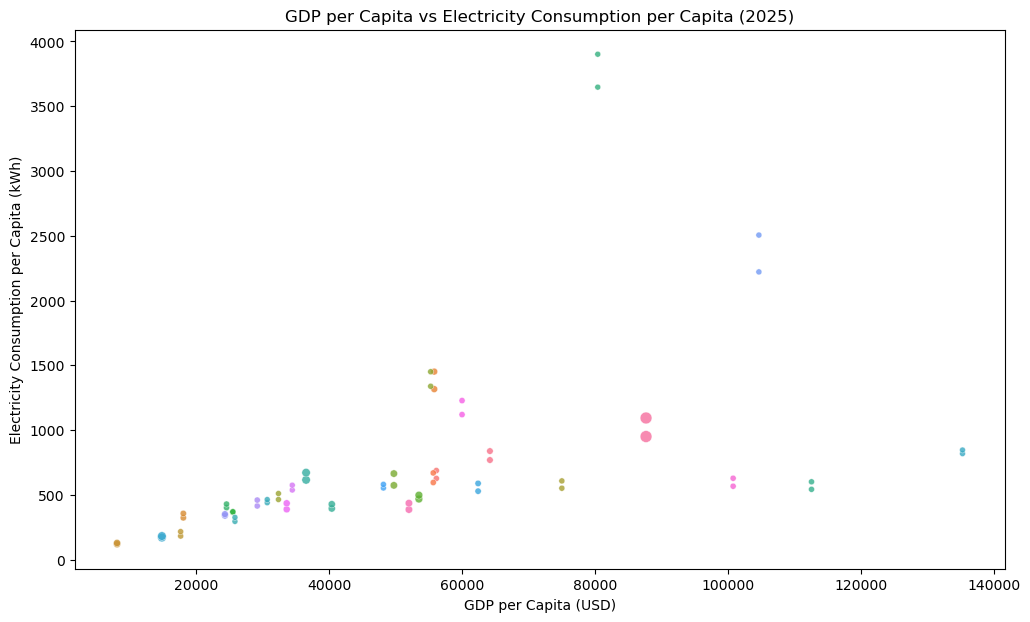

In [82]:

# Convert GDP and Population to numeric (in case of commas or bad entries)
mes_df['GDP'] = pd.to_numeric(mes_df['GDP'], errors='coerce')
mes_df['Population'] = pd.to_numeric(mes_df['Population'], errors='coerce')

# Filter to Final Consumption rows for Electricity only
final_df = mes_df[
    (mes_df['Balance'] == 'Final Consumption (Calculated)') &
    (mes_df['Product'] == 'Electricity')
]

# Select the most recent year available (e.g., 2025)
latest_year = final_df['Year'].max()
data = final_df[final_df['Year'] == latest_year].copy()

# Compute GDP per capita and Consumption per capita (convert GWh to kWh)
data['GDP_per_capita'] = data['GDP'] / data['Population']
data['Consumption_per_capita'] = data['Value'] * 1e6 / data['Population']

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=data,
    x='GDP_per_capita',
    y='Consumption_per_capita',
    size='Population',
    hue='Country',
    alpha=0.8,
    legend=False
)
plt.title(f'GDP per Capita vs Electricity Consumption per Capita ({latest_year})')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Electricity Consumption per Capita (kWh)')

plt.show()


In [83]:
mes_df.columns


Index(['Country', 'Balance', 'Product', 'Value', 'Unit', 'Year', 'Month',
       'GDP', 'Population'],
      dtype='object')

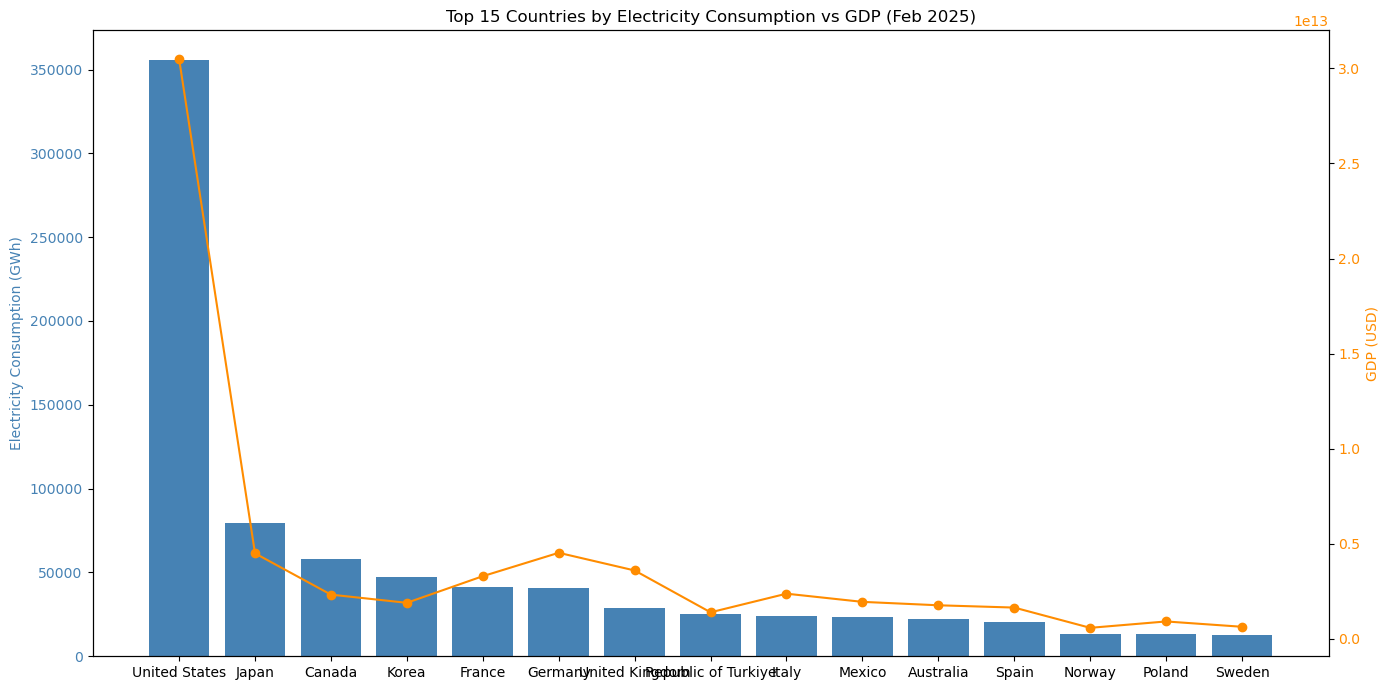

In [84]:
# Ensure 'Month' is in proper format (string like 'Feb') and 'Year' is integer
mes_feb_2025 = mes_df[(mes_df['Year'] == 2025) ]

# Focus only on Final Consumption rows
consumption_feb = mes_feb_2025[mes_feb_2025['Balance'] == "Final Consumption (Calculated)"]

# Group and get top 15 countries by consumption
top_15 = consumption_feb.groupby('Country')[['Value', 'GDP']].mean().reset_index()
top_15 = top_15.sort_values('Value', ascending=False).head(15)

# Now reuse the previous plotting code
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar for electricity consumption
ax1.bar(top_15["Country"], top_15["Value"], color="steelblue", label="Electricity Consumption (GWh)")
ax1.set_ylabel("Electricity Consumption (GWh)", color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")

# Line for GDP
ax2 = ax1.twinx()
ax2.plot(top_15["Country"], top_15["GDP"], color="darkorange", marker="o", label="GDP (USD)")
ax2.set_ylabel("GDP (USD)", color="darkorange")
ax2.tick_params(axis='y', labelcolor="darkorange")

plt.title("Top 15 Countries by Electricity Consumption vs GDP (Feb 2025)")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


In [85]:
mes_df['Balance'].unique()

array(['Net Electricity Production', 'Used for pumped storage',
       'Distribution Losses', 'Final Consumption (Calculated)',
       'Total Imports', 'Total Exports', 'Remarks'], dtype=object)

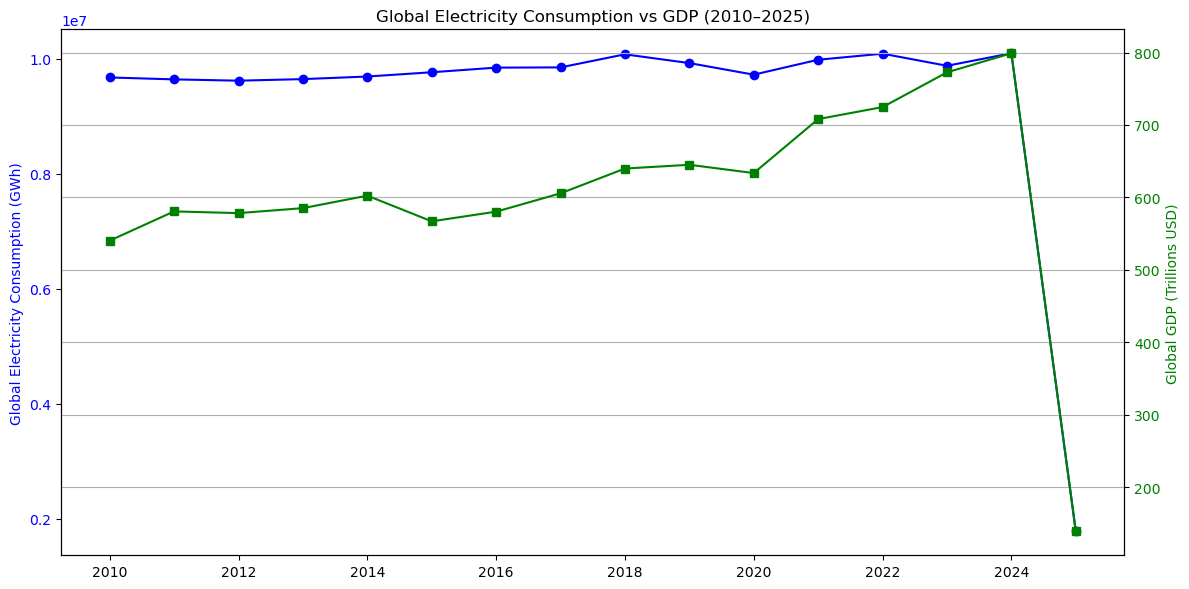

In [86]:
import matplotlib.pyplot as plt

# Filter only Final Consumption
final_df = mes_df[mes_df['Balance'] == 'Final Consumption (Calculated)']

# Group by Year to get global totals
annual_totals = final_df.groupby('Year').agg({
    'Value': 'sum',
    'GDP': 'sum'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis (left): Electricity Consumption
ax1.plot(annual_totals['Year'], annual_totals['Value'], color='blue', marker='o', label='Electricity Consumption (GWh)')
ax1.set_ylabel("Global Electricity Consumption (GWh)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis (right): GDP
ax2 = ax1.twinx()
ax2.plot(annual_totals['Year'], annual_totals['GDP'] / 1e12, color='green', marker='s', label='Global GDP')
ax2.set_ylabel("Global GDP (Trillions USD)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Global Electricity Consumption vs GDP (2010–2025)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


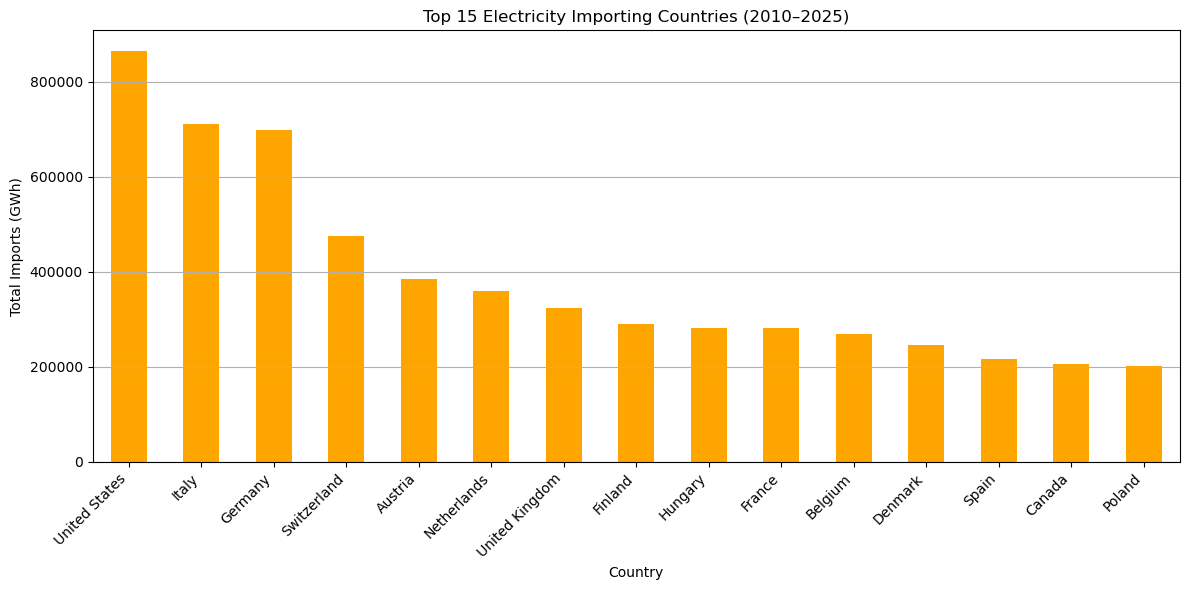

In [87]:
imports_df = mes_df[
    (mes_df["Balance"] == "Total Imports") &
    (mes_df["Product"] == "Electricity")
]

# Group by country and sum over years
top_importers = imports_df.groupby("Country")["Value"].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
top_importers.plot(kind='bar', color='orange')
plt.title("Top 15 Electricity Importing Countries (2010–2025)")
plt.ylabel("Total Imports (GWh)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [88]:
mes_df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Republic of Turkiye', 'United Kingdom',
       'United States', 'Argentina', 'Brazil', 'Bulgaria',
       "People's Republic of China", 'Croatia', 'Cyprus', 'India',
       'Malta', 'North Macedonia', 'Romania', 'Serbia'], dtype=object)

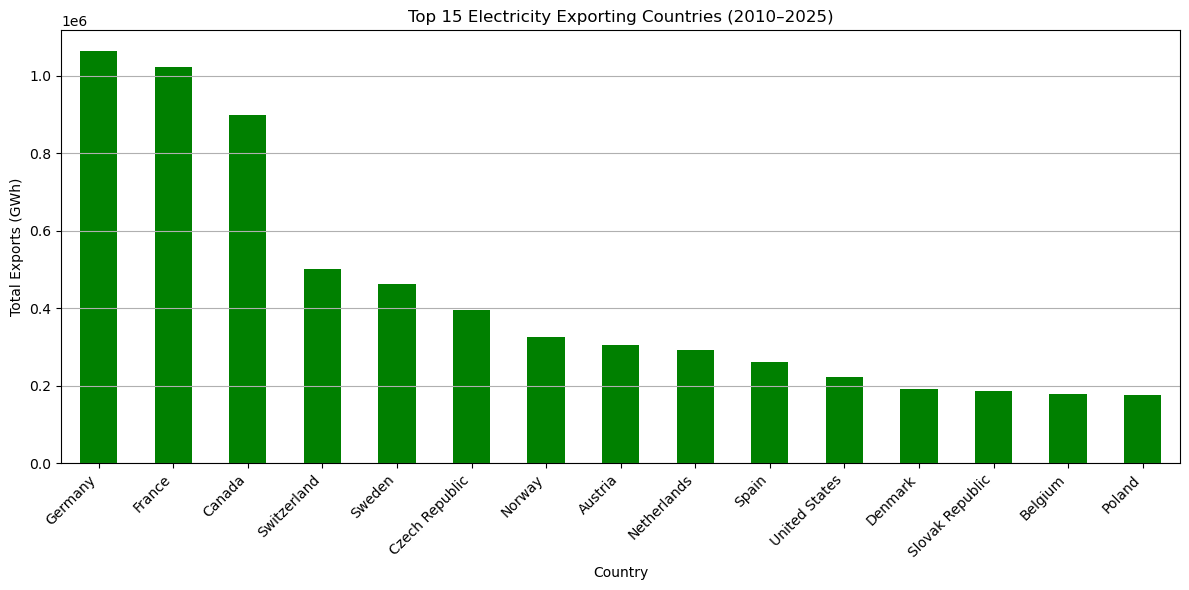

In [89]:
import matplotlib.pyplot as plt

# Filter for Total Exports
exports_df = mes_df[
    (mes_df["Balance"] == "Total Exports") &
    (mes_df["Product"] == "Electricity")
]

# Group by country and sum over years
top_exporters = exports_df.groupby("Country")["Value"].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
top_exporters.plot(kind='bar', color='green')
plt.title("Top 15 Electricity Exporting Countries (2010–2025)")
plt.ylabel("Total Exports (GWh)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



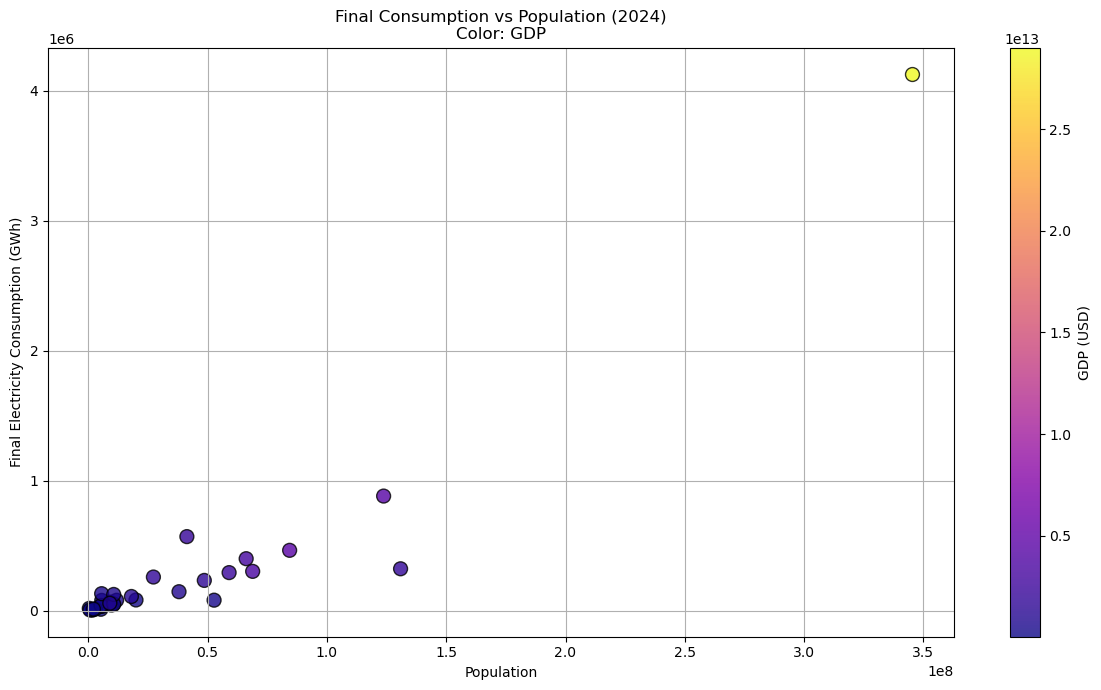

In [90]:
import matplotlib.pyplot as plt

# Filter Final Consumption for full 2024
scatter_df = mes_df[
    (mes_df["Balance"] == "Final Consumption (Calculated)") &
    (mes_df["Year"] == 2024)
]

# Group by Country
grouped = scatter_df.groupby("Country").agg({
    "Value": "sum",           # Final consumption (GWh)
    "GDP": "mean",
    "Population": "mean"
}).reset_index()

# Plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    grouped["Population"],
    grouped["Value"],
    c=grouped["GDP"],
    cmap="plasma",
    s=100,
    edgecolor="black",
    alpha=0.8
)

plt.colorbar(scatter, label="GDP (USD)")
plt.xlabel("Population")
plt.ylabel("Final Electricity Consumption (GWh)")
plt.title("Final Consumption vs Population (2024)\nColor: GDP")
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
df = pd.read_excel("df_modeling.xlsx")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131913 entries, 0 to 131912
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Country     131913 non-null  object 
 1   Balance     131913 non-null  object 
 2   Product     131913 non-null  object 
 3   Value       131913 non-null  float64
 4   Unit        131913 non-null  object 
 5   Year        131913 non-null  int64  
 6   Month       131913 non-null  object 
 7   GDP         131913 non-null  int64  
 8   Population  131913 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 9.1+ MB


In [95]:
df.isnull().sum()

Country       0
Balance       0
Product       0
Value         0
Unit          0
Year          0
Month         0
GDP           0
Population    0
dtype: int64

In [96]:
df['Product'].unique()

array(['Electricity', 'Hydro', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Solar',
       'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Wind',
       'Geothermal', 'Other Combustible Non-Renewables', 'Not Specified',
       'Nuclear', 'Other Renewables'], dtype=object)

In [97]:
df['Balance'].unique()

array(['Net Electricity Production', 'Used for pumped storage',
       'Distribution Losses', 'Final Consumption (Calculated)',
       'Total Imports', 'Total Exports'], dtype=object)

In [98]:
# Drop rows where Balance is 'Remarks' or Product is 'Data is estimated for this month'
df_cleaned = df[~((df['Balance'] == 'Remarks') | (df['Product'] == 'Data is estimated for this month'))].copy()

# Confirm cleanup
print("Missing values after cleanup:", df_cleaned['Value'].isnull().sum())


Missing values after cleanup: 0


In [99]:
df_cleaned.to_excel("df_modeling.xlsx", index=False)

In [100]:
import pandas as pd

In [101]:
# Filter only rows related to Final Consumption
final_consumption_df = df[df['Balance'] == 'Final Consumption (Calculated)']

# Check descriptive stats
final_consumption_df['Value'].describe()



count      6554.000000
mean      22777.074608
std       54905.713897
min         435.965000
25%        2894.871425
50%        6401.605000
75%       21781.448525
max      412844.244900
Name: Value, dtype: float64

In [102]:
# All countries in the dataset
all_countries = set(df['Country'].unique())

# Countries with Final Consumption (Calculated)
fc_countries = set(df[df['Balance'] == 'Final Consumption (Calculated)']['Country'].unique())

# Countries without Final Consumption
missing_fc_countries = all_countries - fc_countries

print("✅ Countries WITH Final Consumption (Calculated):", len(fc_countries))
print("❌ Countries MISSING Final Consumption (Calculated):", len(missing_fc_countries))
print("\nMissing Countries List:\n", sorted(missing_fc_countries))



✅ Countries WITH Final Consumption (Calculated): 37
❌ Countries MISSING Final Consumption (Calculated): 11

Missing Countries List:
 ['Argentina', 'Brazil', 'Bulgaria', 'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia', "People's Republic of China", 'Romania', 'Serbia']


In [103]:
# Pivot to get all 3 required components side by side
pivot = df[df['Balance'].isin([
    'Net Electricity Production',
    'Distribution Losses',
    'Used for pumped storage'
])].pivot_table(
    index=['Country', 'Year', 'Month'],
    columns='Balance',
    values='Value',
    aggfunc='sum'
).reset_index()

# Drop rows with any missing component
pivot = pivot.dropna(subset=[
    'Net Electricity Production',
    'Distribution Losses',
    'Used for pumped storage'
])

# Estimate Final Consumption
pivot['Final Consumption (Estimated)'] = (
    pivot['Net Electricity Production']
    - pivot['Distribution Losses']
    - pivot['Used for pumped storage']
)

# Inject estimated values into original df
df.loc[
    df['Balance'] == 'Final Consumption (Estimated)', 'Value'
] = df[df['Balance'] == 'Final Consumption (Estimated)'].merge(
    pivot[['Country', 'Year', 'Month', 'Final Consumption (Estimated)']],
    on=['Country', 'Year', 'Month'],
    how='left'
)['Final Consumption (Estimated)'].values

# Check results
filled = df[(df['Balance'] == 'Final Consumption (Estimated)') & (df['Value'].notna())]
print(f"✅ Final Consumption successfully estimated for {len(filled)} rows")


✅ Final Consumption successfully estimated for 0 rows


In [104]:
# Get list of countries with Final Consumption (Calculated)
countries_with_fc = df[df['Balance'] == 'Final Consumption (Calculated)']['Country'].unique()

# Filter the full dataset to include only those countries
df_filtered = df[df['Country'].isin(countries_with_fc)].reset_index(drop=True)



In [105]:
df_filtered.to_excel("df_filtered.xlsx", index=False)

In [106]:
df_filtered = pd.read_excel("df_filtered.xlsx")

In [107]:
df_filtered['Feature'] = df_filtered['Balance'] + ' - ' + df_filtered['Product']

pivot_df = df_filtered.pivot_table(
    index=['Country', 'Year', 'Month', 'GDP', 'Population'],
    columns='Feature',
    values='Value',
    aggfunc='sum'
).reset_index()

pivot_df.columns.name = None
pivot_df.columns = [str(col) for col in pivot_df.columns]

pivot_df.head()


,Country,Year,Month,GDP,Population,Distribution Losses - Electricity,Final Consumption (Calculated) - Electricity,"Net Electricity Production - Coal, Peat and Manufactured Gases",Net Electricity Production - Combustible Renewables,Net Electricity Production - Electricity,...,Net Electricity Production - Oil and Petroleum Products,Net Electricity Production - Other Combustible Non-Renewables,Net Electricity Production - Other Renewables,Net Electricity Production - Solar,Net Electricity Production - Total Combustible Fuels,"Net Electricity Production - Total Renewables (Hydro, Geo, Solar, Wind, Other)",Net Electricity Production - Wind,Total Exports - Electricity,Total Imports - Electricity,Used for pumped storage - Electricity
0,Australia,2010,Apr,1301240000000,22141581,1266.285,16816.005,12999.464,216.287,18089.041,...,58.605,NaN,NaN,26.811,16667.230,1638.098,350.511,NaN,NaN,6.750
1,Australia,2010,Aug,1301240000000,22141581,1453.335,19633.351,14207.784,165.184,21105.796,...,247.449,NaN,NaN,84.458,18774.540,2496.439,574.758,NaN,NaN,19.110
2,Australia,2010,Dec,1301240000000,22141581,1326.756,17979.741,12764.666,165.184,19325.286,...,60.700,NaN,NaN,175.143,16944.065,2546.406,562.097,NaN,NaN,18.789
3,Australia,2010,Feb,1301240000000,22141581,1311.132,17819.769,13482.774,216.287,19137.652,...,401.521,NaN,NaN,38.884,17725.061,1628.878,390.199,NaN,NaN,6.750
4,Australia,2010,Jan,1301240000000,22141581,1414.546,19317.931,14796.776,216.287,20739.227,...,732.302,NaN,NaN,49.216,19289.730,1665.783,409.469,NaN,NaN,6.750


In [108]:
if 'Remarks - Data is estimated for this month' in pivot_df.columns:
    pivot_df.drop(columns=['Remarks - Data is estimated for this month'], inplace=True)


In [109]:
# Count and percentage of NaN per column
null_counts = df_filtered.isna().sum()
null_percent = (df_filtered.isna().sum() / len(df_filtered)) * 100

null_df = pd.DataFrame({
    'Missing Values': null_counts,
    'Percent Missing': null_percent.round(2)
})

null_df.sort_values(by='Percent Missing', ascending=False)


,Missing Values,Percent Missing
Country,0,0.0
Balance,0,0.0
Product,0,0.0
Value,0,0.0
Unit,0,0.0
Year,0,0.0
Month,0,0.0
GDP,0,0.0
Population,0,0.0
Feature,0,0.0


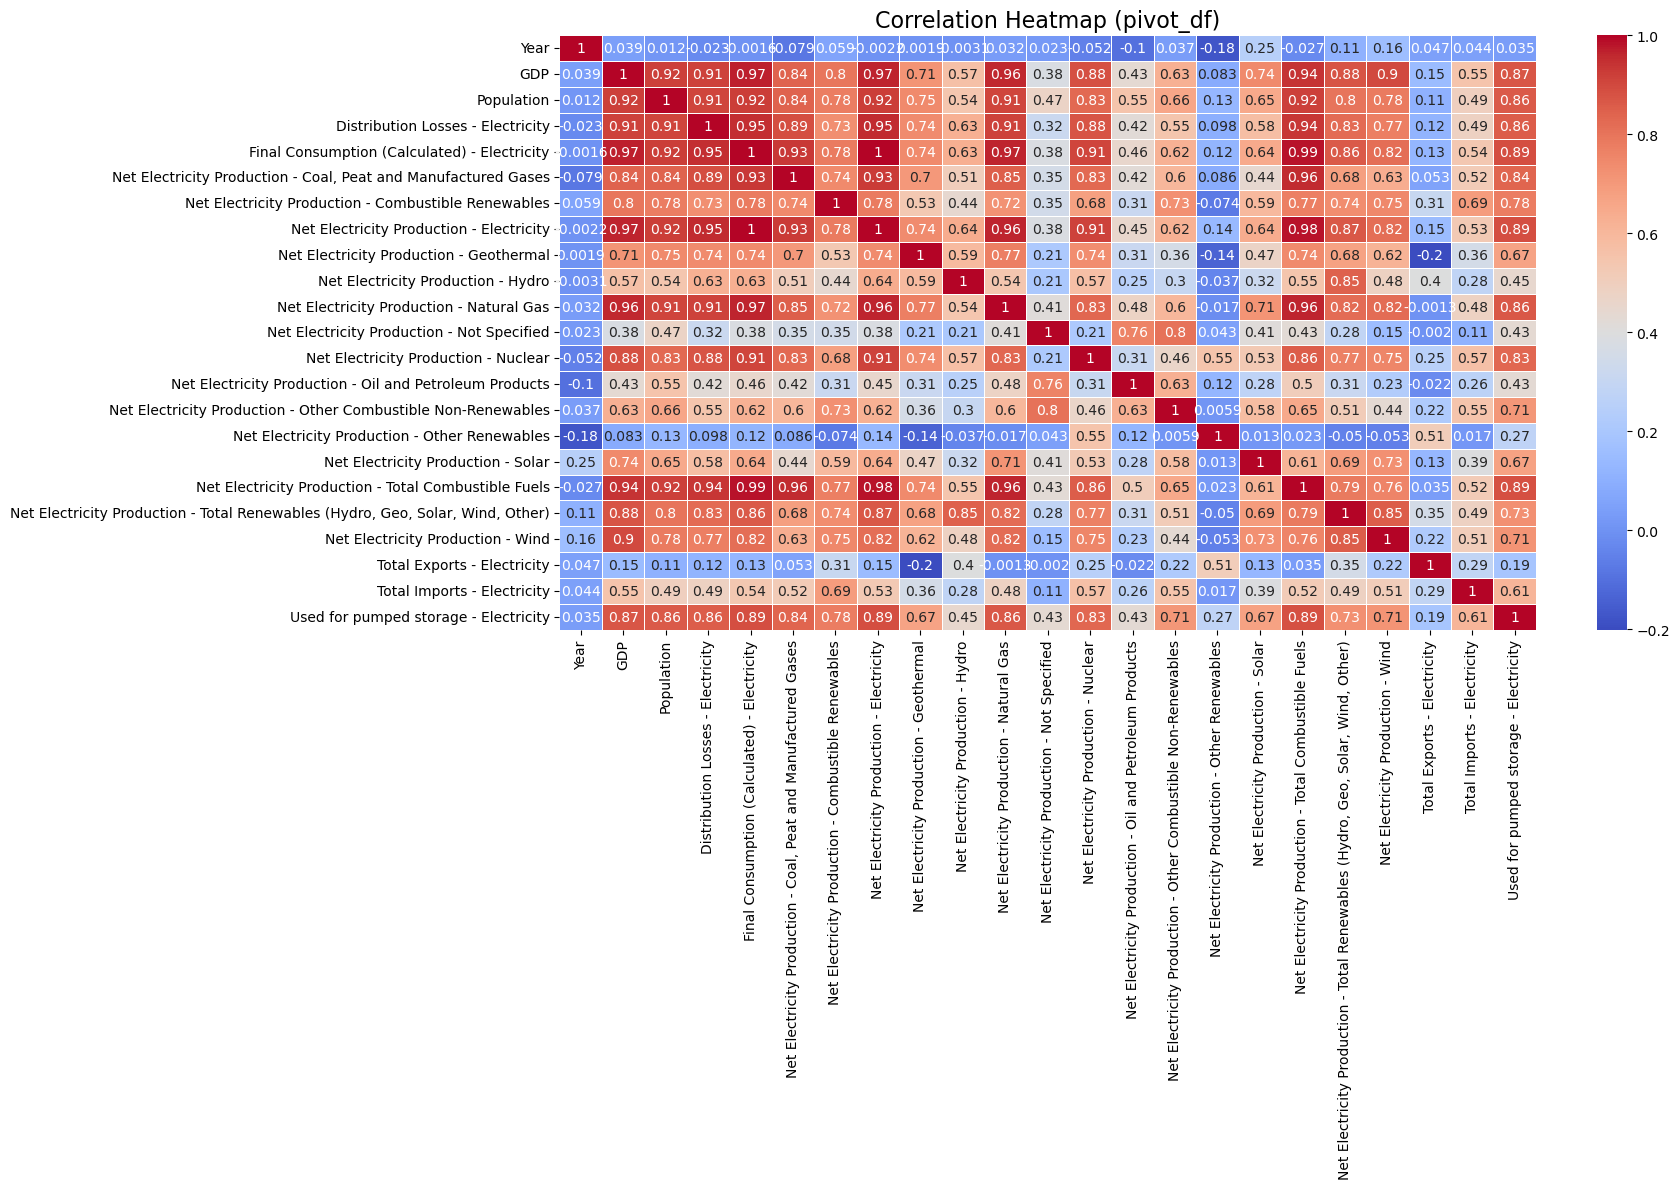

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns before correlation
numeric_cols = pivot_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (pivot_df)', fontsize=16)
plt.tight_layout()
plt.show()


In [111]:
missing_summary = pivot_df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("🔍 Features with missing values:\n")
print(missing_summary)



🔍 Features with missing values:

Net Electricity Production - Other Renewables                     4265
Net Electricity Production - Geothermal                           2759
Net Electricity Production - Nuclear                              2283
Net Electricity Production - Not Specified                        1748
Used for pumped storage - Electricity                             1372
Net Electricity Production - Other Combustible Non-Renewables      751
Total Imports - Electricity                                        706
Total Exports - Electricity                                        701
Net Electricity Production - Coal, Peat and Manufactured Gases     645
Net Electricity Production - Solar                                 291
Net Electricity Production - Natural Gas                           221
Net Electricity Production - Oil and Petroleum Products            162
Net Electricity Production - Combustible Renewables                135
Net Electricity Production - Wind           

In [112]:
# Drop sparse / unclear features
columns_to_drop = [
    'Net Electricity Production - Other Renewables',
    'Net Electricity Production - Other Combustible Non-Renewables',
    'Net Electricity Production - Not Specified',
    'Used for pumped storage - Electricity'
]

pivot_df.drop(columns=columns_to_drop, inplace=True)

# Fill remaining NaNs with 0 (e.g., if a country had no solar/nuclear that month)
pivot_df.fillna(0, inplace=True)


In [113]:
print("📋 Final Columns in Dataset:")
print(pivot_df.columns.tolist())


📋 Final Columns in Dataset:
['Country', 'Year', 'Month', 'GDP', 'Population', 'Distribution Losses - Electricity', 'Final Consumption (Calculated) - Electricity', 'Net Electricity Production - Coal, Peat and Manufactured Gases', 'Net Electricity Production - Combustible Renewables', 'Net Electricity Production - Electricity', 'Net Electricity Production - Geothermal', 'Net Electricity Production - Hydro', 'Net Electricity Production - Natural Gas', 'Net Electricity Production - Nuclear', 'Net Electricity Production - Oil and Petroleum Products', 'Net Electricity Production - Solar', 'Net Electricity Production - Total Combustible Fuels', 'Net Electricity Production - Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Net Electricity Production - Wind', 'Total Exports - Electricity', 'Total Imports - Electricity']


In [114]:
pivot_df['Month'] = pd.to_datetime(pivot_df['Month'], format='%b').dt.month

# Define target
y = pivot_df['Final Consumption (Calculated) - Electricity']

# Define features (based on hypothesis)
features = [
    'GDP', 'Population', 'Year', 'Month',
    'Distribution Losses - Electricity',
    'Net Electricity Production - Coal, Peat and Manufactured Gases',
    'Net Electricity Production - Combustible Renewables',
    'Net Electricity Production - Geothermal',
    'Net Electricity Production - Hydro',
    'Net Electricity Production - Natural Gas',
    'Net Electricity Production - Nuclear',
    'Net Electricity Production - Oil and Petroleum Products',
    'Net Electricity Production - Solar',
    'Net Electricity Production - Wind',
    'Total Imports - Electricity',
    'Total Exports - Electricity'
]

X = pivot_df[features]


In [115]:
from sklearn.impute import SimpleImputer

# We'll impute only numeric columns (excluding target)
X = pivot_df.drop(columns=['Final Consumption (Calculated) - Electricity', 'Country', 'Month'])  # drop non-numeric + target
y = pivot_df['Final Consumption (Calculated) - Electricity']

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [117]:
cols_to_drop = [
    'Net Electricity Production - Electricity',
    'Net Electricity Production - Total Combustible Fuels',
    'Net Electricity Production - Total Renewables (Hydro, Geo, Solar, Wind, Other)'
]
pivot_df_reduced = pivot_df.drop(columns=cols_to_drop)

TIME SERIES


In [118]:
# Check structure and data types
pivot_df_reduced.info()

# Quick view of first few rows
pivot_df_reduced.head()

# Check for missing values
pivot_df_reduced.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         6554 non-null   object 
 1   Year                                                            6554 non-null   int64  
 2   Month                                                           6554 non-null   int32  
 3   GDP                                                             6554 non-null   int64  
 4   Population                                                      6554 non-null   int64  
 5   Distribution Losses - Electricity                               6554 non-null   float64
 6   Final Consumption (Calculated) - Electricity                    6554 non-null   float64
 7   Net Electricity Production - Coal, Peat and Manufac

Country                                                           0
Year                                                              0
Month                                                             0
GDP                                                               0
Population                                                        0
Distribution Losses - Electricity                                 0
Final Consumption (Calculated) - Electricity                      0
Net Electricity Production - Coal, Peat and Manufactured Gases    0
Net Electricity Production - Combustible Renewables               0
Net Electricity Production - Geothermal                           0
Net Electricity Production - Hydro                                0
Net Electricity Production - Natural Gas                          0
Net Electricity Production - Nuclear                              0
Net Electricity Production - Oil and Petroleum Products           0
Net Electricity Production - Solar              

In [119]:
pivot_df_reduced.to_excel("cleaned_forecasting_dataset.xlsx", index=False)


Structure the Data for Time Series

In [120]:
# Ensure Month is in numeric format
import calendar

if pivot_df_reduced['Month'].dtype == 'object':
    pivot_df_reduced['Month'] = pivot_df_reduced['Month'].apply(lambda x: list(calendar.month_abbr).index(x[:3].title()))

# Combine Year and Month into a proper datetime
pivot_df_reduced['Date'] = pd.to_datetime(pivot_df_reduced[['Year', 'Month']].assign(DAY=1))

# Sort properly
pivot_df_reduced = pivot_df_reduced.sort_values(by=['Country', 'Date']).reset_index(drop=True)

# Check result
pivot_df_reduced[['Country', 'Date', 'Final Consumption (Calculated) - Electricity']].head()


,Country,Date,Final Consumption (Calculated) - Electricity
0,Australia,2010-01-01,19317.931
1,Australia,2010-02-01,17819.769
2,Australia,2010-03-01,18092.787
3,Australia,2010-04-01,16816.005
4,Australia,2010-05-01,18417.949


In [121]:
# Convert datetime to string format YYYY-MM
pivot_df_reduced['Date'] = pivot_df_reduced['Date'].dt.to_period('M').astype(str)

# Optional: convert back to datetime if needed later
# pivot_df_reduced['Date'] = pd.to_datetime(pivot_df_reduced['Date'])

# Check
pivot_df_reduced[['Country', 'Date', 'Final Consumption (Calculated) - Electricity']].head()


,Country,Date,Final Consumption (Calculated) - Electricity
0,Australia,2010-01,19317.931
1,Australia,2010-02,17819.769
2,Australia,2010-03,18092.787
3,Australia,2010-04,16816.005
4,Australia,2010-05,18417.949


Starting with Australia as a test case.  (Error with Prophet probaly try with Google colab)

In [122]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for Prophet
australia_df = pivot_df_reduced[pivot_df_reduced['Country'] == 'Australia'][['Date', 'Final Consumption (Calculated) - Electricity']].copy()
australia_df.rename(columns={'Date': 'ds', 'Final Consumption (Calculated) - Electricity': 'y'}, inplace=True)

# Convert ds to datetime (Prophet requires it in datetime format)
australia_df['ds'] = pd.to_datetime(australia_df['ds'])

# Initialize and fit model
model = Prophet()
model.fit(australia_df)

# Create future dataframe (e.g., forecast 12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title("Australia: Forecast of Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (GWh)")
plt.show()


ModuleNotFoundError: No module named 'prophet'

In [123]:
pivot_df_reduced.to_excel("pivot_df_reduced_cleaned.xlsx", index=False)


NEW DAY

In [125]:
import pandas as pd

# Load the cleaned dataset
# file_path = "/content/pivot_df_reduced_cleaned.xlsx"
pivot_df = pd.read_excel('pivot_df_reduced_cleaned.xlsx')

# Preview the first few rows
pivot_df.head()

,Country,Year,Month,GDP,Population,Distribution Losses - Electricity,Final Consumption (Calculated) - Electricity,"Net Electricity Production - Coal, Peat and Manufactured Gases",Net Electricity Production - Combustible Renewables,Net Electricity Production - Geothermal,Net Electricity Production - Hydro,Net Electricity Production - Natural Gas,Net Electricity Production - Nuclear,Net Electricity Production - Oil and Petroleum Products,Net Electricity Production - Solar,Net Electricity Production - Wind,Total Exports - Electricity,Total Imports - Electricity,Date
0,Australia,2010,1,1301240000000,22141581,1414.546,19317.931,14796.776,216.287,0.083,990.728,3544.365,0.0,732.302,49.216,409.469,0.0,0.0,2010-01
1,Australia,2010,2,1301240000000,22141581,1311.132,17819.769,13482.774,216.287,0.083,983.425,3624.479,0.0,401.521,38.884,390.199,0.0,0.0,2010-02
2,Australia,2010,3,1301240000000,22141581,1374.157,18092.787,14529.374,216.287,0.083,852.869,3334.396,0.0,87.778,37.252,415.654,0.0,0.0,2010-03
3,Australia,2010,4,1301240000000,22141581,1266.285,16816.005,12999.464,216.287,0.083,1044.406,3392.874,0.0,58.605,26.811,350.511,0.0,0.0,2010-04
4,Australia,2010,5,1301240000000,22141581,1371.409,18417.949,13822.503,216.287,0.083,1318.908,3883.549,0.0,238.421,19.523,296.832,0.0,0.0,2010-05


In [126]:
# Filter for one country — e.g., Australia
australia_df = pivot_df[pivot_df['Country'] == 'Australia'].copy()

# Prepare for Prophet (rename columns)
prophet_df = australia_df[['Date', 'Final Consumption (Calculated) - Electricity']].rename(
    columns={'Date': 'ds', 'Final Consumption (Calculated) - Electricity': 'y'}
)

# Sort by date just in case
prophet_df = prophet_df.sort_values('ds').reset_index(drop=True)


In [127]:
# Convert to datetime
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# Split the data
train_df = prophet_df[prophet_df['ds'] < '2023-01-01']
test_df = prophet_df[prophet_df['ds'] >= '2023-01-01']


In [ ]:
from prophet import Prophet

# Initialize and fit model
model = Prophet()
model.fit(train_df)

# Create future dataframe for the same length as test set
future = model.make_future_dataframe(periods=len(test_df), freq='MS')  # 'MS' = Month Start

# Forecast
forecast = model.predict(future)

# Merge actuals from test set
forecast_df = forecast[['ds', 'yhat']].merge(test_df, on='ds', how='left')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/gq60izoe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/hwcx77x8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22663', 'data', 'file=/tmp/tmpwcdf5k8c/gq60izoe.json', 'init=/tmp/tmpwcdf5k8c/hwcx77x8.json', 'output', 'file=/tmp/tmpwcdf5k8c/prophet_modelmp6_fzlp/prophet_model-20250606025053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:50:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filter only the forecasted test period
forecast_test = forecast_df[forecast_df['y'].notna()]

# Evaluation metrics
mae = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])
mse = mean_squared_error(forecast_test['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(forecast_test['y'], forecast_test['yhat'])

print(f"📌 Prophet Forecast Accuracy:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


NameError: name 'forecast_df' is not defined

<ipython-input-9-c4f6779e3792>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


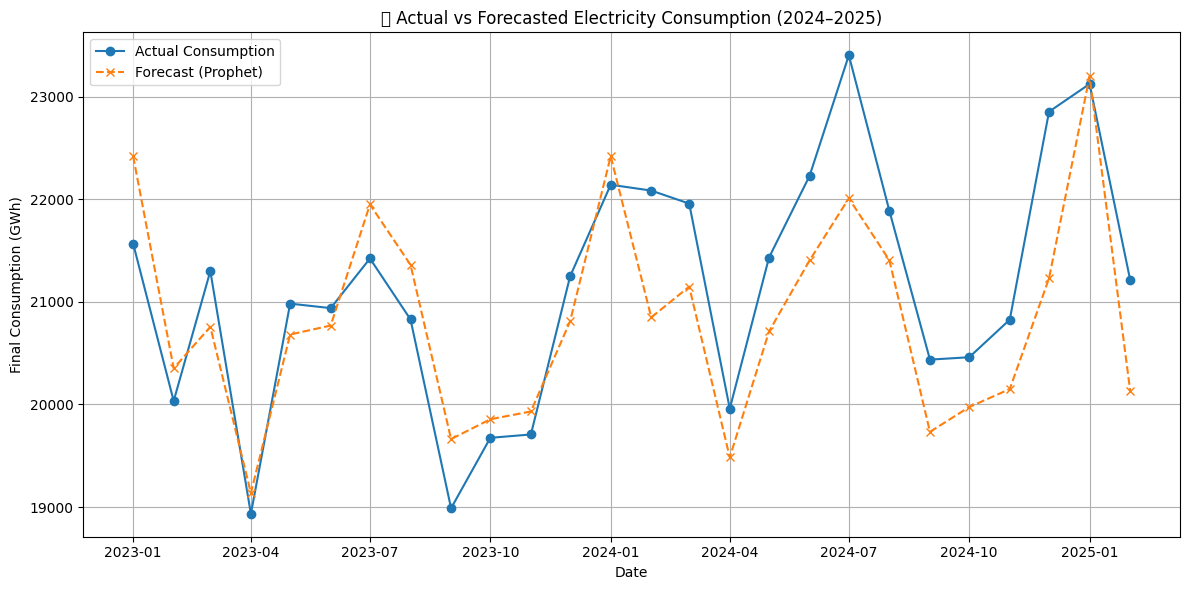

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(forecast_test['ds'], forecast_test['y'], label='Actual Consumption', marker='o')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Forecast (Prophet)', linestyle='--', marker='x')
plt.title("📈 Actual vs Forecasted Electricity Consumption (2024–2025)")
plt.xlabel("Date")
plt.ylabel("Final Consumption (GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

selected_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States',
                      'Brazil', 'Russia', 'India', 'China', 'South Africa']

results = {}
actuals_dict = {}
forecasts_dict = {}

for country in selected_countries:
    print(f"⏳ Forecasting for {country}...")
    country_df = pivot_df[pivot_df['Country'] == country].copy()

    # Create Prophet-friendly format
    prophet_df = country_df[['Date', 'Final Consumption (Calculated) - Electricity']].rename(
        columns={'Date': 'ds', 'Final Consumption (Calculated) - Electricity': 'y'}
    )
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

    # Train-test split
    train_df = prophet_df[prophet_df['ds'] < '2023-01-01']
    test_df = prophet_df[prophet_df['ds'] >= '2023-01-01']

    if train_df['y'].notna().sum() < 2 or test_df.empty:
        print(f"⚠️ Skipping {country} due to insufficient data.")
        continue

    model = Prophet()
    model.fit(train_df)

    future = model.make_future_dataframe(periods=len(test_df), freq='MS')
    forecast = model.predict(future)

    # Store forecast and actuals for plotting later
    forecast_trimmed = forecast[forecast['ds'].isin(test_df['ds'])]
    actuals_dict[country] = test_df.reset_index(drop=True)
    forecasts_dict[country] = forecast_trimmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].reset_index(drop=True)

    # Metrics
    merged = test_df.merge(forecast_trimmed[['ds', 'yhat']], on='ds', how='left')
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    mse = mean_squared_error(merged['y'], merged['yhat'])
    rmse = np.sqrt(mse)
    r2 = r2_score(merged['y'], merged['yhat'])

    results[country] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Save results
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
display(results_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/y5qy8r9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/tx55szv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72229', 'data', 'file=/tmp/tmpwcdf5k8c/y5qy8r9m.json', 'init=/tmp/tmpwcdf5k8c/tx55szv9.json', 'output', 'file=/tmp/tmpwcdf5k8c/prophet_modelurl9btgb/prophet_model-20250606034009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


⏳ Forecasting for Canada...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/ccn8ym4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/h2zeov6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91310', 'data', 'file=/tmp/tmpwcdf5k8c/ccn8ym4s.json', 'init=/tmp/tmpwcdf5k8c/h2zeov6l.json', 'output', 'file=/tmp/tmpwcdf5k8c/prophet_model_jvsjfh2/prophet_model-20250606034009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

⏳ Forecasting for France...
⏳ Forecasting for Germany...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/_7qv3n5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/y1fscbbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17701', 'data', 'file=/tmp/tmpwcdf5k8c/_7qv3n5m.json', 'init=/tmp/tmpwcdf5k8c/y1fscbbc.json', 'output', 'file=/tmp/tmpwcdf5k8c/prophet_model_3dary3v/prophet_model-20250606034009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

⏳ Forecasting for Italy...
⏳ Forecasting for Japan...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/0ip8jc6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/yfj_ii91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90344', 'data', 'file=/tmp/tmpwcdf5k8c/0ip8jc6p.json', 'init=/tmp/tmpwcdf5k8c/yfj_ii91.json', 'output', 'file=/tmp/tmpwcdf5k8c/prophet_modeltsjbbaz8/prophet_model-20250606034010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

⏳ Forecasting for United Kingdom...
⏳ Forecasting for United States...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/dzpqb80l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcdf5k8c/4g4h83lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10109', 'data', 'file=/tmp/tmpwcdf5k8c/dzpqb80l.json', 'init=/tmp/tmpwcdf5k8c/4g4h83lw.json', 'output', 'file=/tmp/tmpwcdf5k8c/prophet_modelitha6ofe/prophet_model-20250606034010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


⏳ Forecasting for Brazil...
⚠️ Skipping Brazil due to insufficient data.
⏳ Forecasting for Russia...
⚠️ Skipping Russia due to insufficient data.
⏳ Forecasting for India...
⚠️ Skipping India due to insufficient data.
⏳ Forecasting for China...
⚠️ Skipping China due to insufficient data.
⏳ Forecasting for South Africa...
⚠️ Skipping South Africa due to insufficient data.


,MAE,MSE,RMSE,R2
Canada,876.480340,1.592609e+06,1261.985947,0.951586
United States,6935.811607,7.215910e+07,8494.651213,0.944209
Italy,609.476201,4.869350e+05,697.807300,0.791145
France,1870.821081,5.883761e+06,2425.646508,0.779130
Japan,3511.517869,1.629723e+07,4036.983225,0.742480
United Kingdom,1349.682825,2.594396e+06,1610.712905,0.597171
Germany,1451.155387,2.919396e+06,1708.624127,0.119713


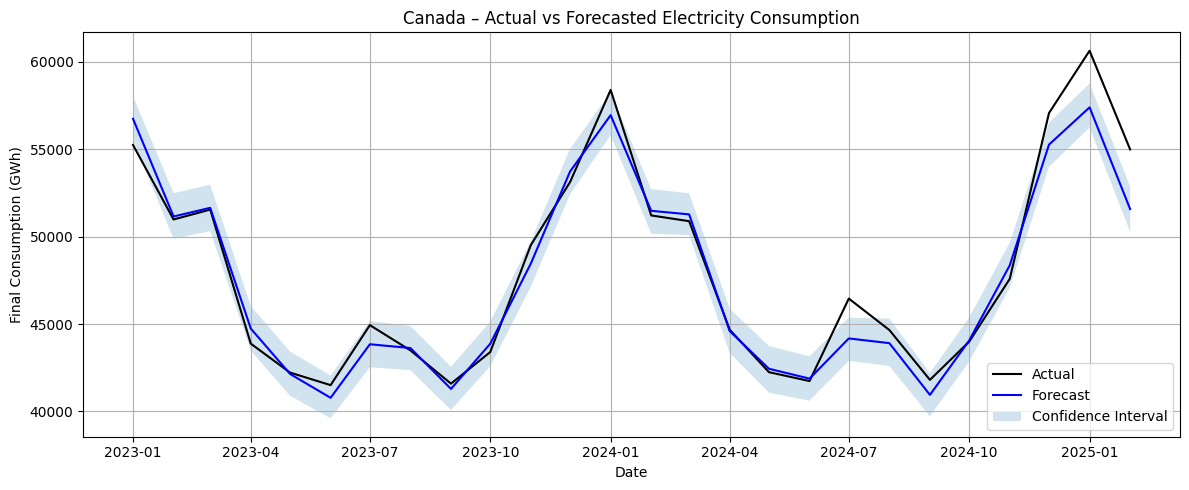

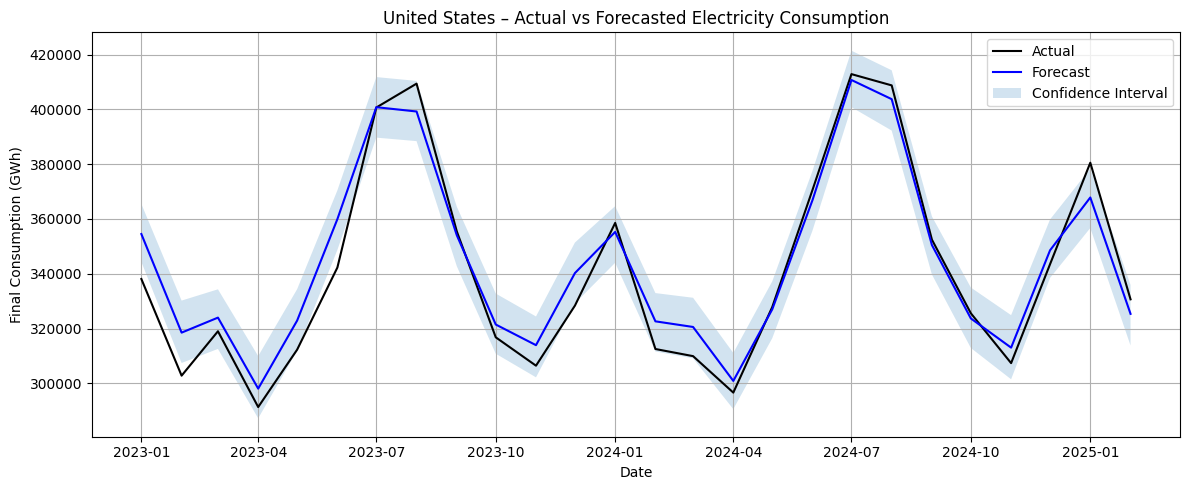

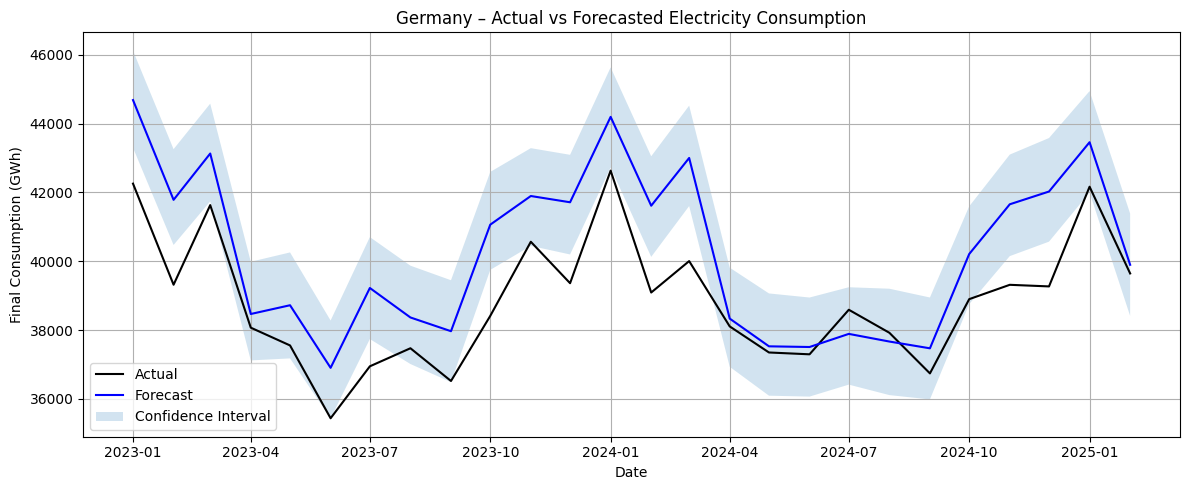

In [ ]:
import matplotlib.pyplot as plt

def plot_forecast(country_name, df_actual, df_forecast):
    plt.figure(figsize=(12, 5))
    plt.plot(df_actual['ds'], df_actual['y'], label='Actual', color='black')
    plt.plot(df_forecast['ds'], df_forecast['yhat'], label='Forecast', color='blue')
    plt.fill_between(df_forecast['ds'], df_forecast['yhat_lower'], df_forecast['yhat_upper'], 
                     alpha=0.2, label='Confidence Interval')
    plt.title(f'{country_name} – Actual vs Forecasted Electricity Consumption')
    plt.xlabel('Date')
    plt.ylabel('Final Consumption (GWh)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_forecast("Canada", actuals_dict["Canada"], forecasts_dict["Canada"])
plot_forecast("United States", actuals_dict["United States"], forecasts_dict["United States"])
plot_forecast("Germany", actuals_dict["Germany"], forecasts_dict["Germany"])


Scatter plot not added to the Project report ..To uncover country-level patterns in electricity demand and economic indicators, a clustering analysis was performed 

,Country,Avg_Consumption,Std_Consumption,Avg_GDP,Avg_Population,Cluster
0,Australia,19579.010176,1413.361562,1.520131e+12,2.466767e+07,0
1,Austria,5377.718039,434.206501,4.404024e+11,8.760308e+06,0
2,Belgium,6892.353777,507.508013,5.423903e+11,1.138202e+07,0
4,Chile,6024.230145,804.414122,2.776776e+11,1.858761e+07,0
6,Costa Rica,919.204744,58.430034,7.973255e+10,5.129587e+06,0
5,Colombia,6053.667656,471.848912,3.326497e+11,4.974236e+07,0
7,Czech Republic,4940.819060,494.286239,2.497783e+11,1.056690e+07,0
8,Denmark,2756.448323,286.035372,3.569810e+11,5.754040e+06,0
15,Iceland,1496.454043,96.769208,2.212627e+10,3.494274e+05,0
9,Estonia,632.834915,100.959534,3.004937e+10,1.330932e+06,0


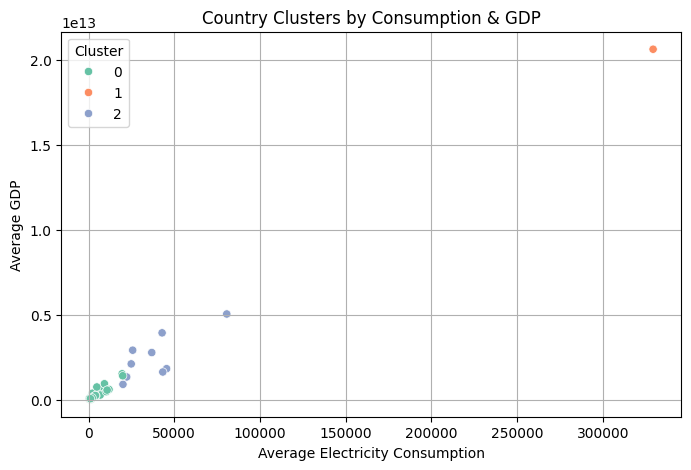

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
pivot_df = pd.read_excel("pivot_df_reduced_cleaned.xlsx")

# Group by country and calculate features for clustering
country_stats = pivot_df.groupby("Country").agg({
    'Final Consumption (Calculated) - Electricity': ['mean', 'std'],
    'GDP': 'mean',
    'Population': 'mean'
}).reset_index()

# Flatten multi-level column names
country_stats.columns = ['Country', 'Avg_Consumption', 'Std_Consumption', 'Avg_GDP', 'Avg_Population']

# Drop countries with missing data
country_stats = country_stats.dropna()

# Normalize features (optional but helpful)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(country_stats[['Avg_Consumption', 'Std_Consumption', 'Avg_GDP', 'Avg_Population']])

# Run KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
country_stats['Cluster'] = kmeans.fit_predict(features_scaled)

# Show result
import pandas as pd
import IPython.display as disp
disp.display(country_stats.sort_values(by='Cluster'))

# Optional: Visualize
plt.figure(figsize=(8, 5))
sns.scatterplot(data=country_stats, x='Avg_Consumption', y='Avg_GDP', hue='Cluster', palette='Set2')
plt.title("Country Clusters by Consumption & GDP")
plt.xlabel("Average Electricity Consumption")
plt.ylabel("Average GDP")
plt.grid(True)
plt.show()


In [ ]:
# Create label descriptions manually based on inspection
cluster_labels = {
    0: 'Stable Demand - Moderate GDP',
    1: 'High Demand - Very High GDP (e.g., USA)',
    2: 'Growing Demand - Emerging Economies'
}

# Map cluster numbers to names
country_stats['Cluster_Label'] = country_stats['Cluster'].map(cluster_labels)

# Display result
country_stats[['Country', 'Cluster', 'Cluster_Label']].sort_values(by='Cluster')


,Country,Cluster,Cluster_Label
0,Australia,0,Stable Demand - Moderate GDP
1,Austria,0,Stable Demand - Moderate GDP
2,Belgium,0,Stable Demand - Moderate GDP
4,Chile,0,Stable Demand - Moderate GDP
6,Costa Rica,0,Stable Demand - Moderate GDP
5,Colombia,0,Stable Demand - Moderate GDP
7,Czech Republic,0,Stable Demand - Moderate GDP
8,Denmark,0,Stable Demand - Moderate GDP
15,Iceland,0,Stable Demand - Moderate GDP
9,Estonia,0,Stable Demand - Moderate GDP


In [ ]:
# Save the results to an Excel file for report inclusion
country_stats.to_excel("electricity_country_clusters.xlsx", index=False)

This part wasn't added to the report, its just to have a better understanding on electricity distribution

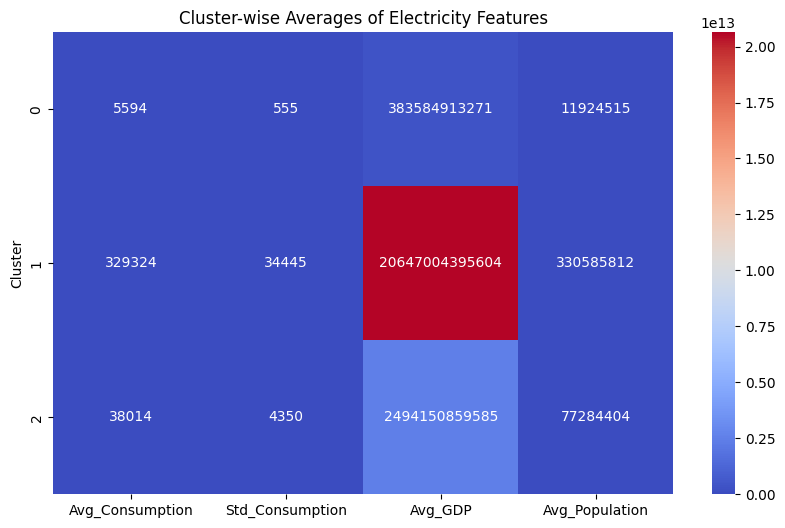

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("electricity_country_clusters.xlsx")

# Group by cluster and compute mean for numeric features
cluster_means = df.groupby("Cluster").mean(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Cluster-wise Averages of Electricity Features")
plt.show()


<ipython-input-21-46a59d07e595>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='pastel')


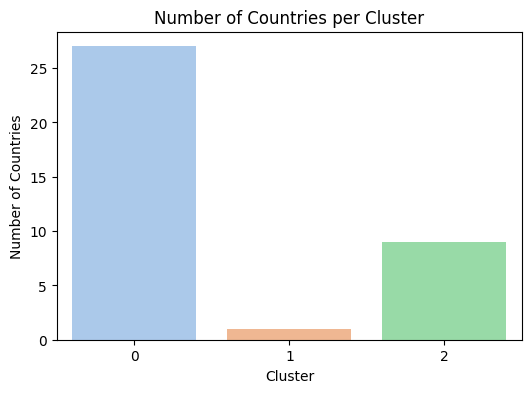

In [ ]:
# Count of countries in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Bar chart of cluster distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='pastel')
plt.xlabel("Cluster")
plt.ylabel("Number of Countries")
plt.title("Number of Countries per Cluster")
plt.show()


The clustering reveals three distinct electricity behavior profiles globally. This segmentation helps contextualize both forecasting and policy implications — from high-demand industrial nations to low-access developing ones. 